In [1]:
from ssestm import SSESTM
from tqdm import tqdm
import pandas as pd
import numpy as np

# 1. Load data

In [2]:
df = pd.read_excel("./data/article_new.xlsx")

In [3]:
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]

In [4]:
train.to_excel("./data/train.xlsx")

In [5]:
test.to_excel("./data/test.xlsx")

# 2. Model initializing

In [6]:
# If you initialize at the first time, you need to 
model = SSESTM(alpha_plus=0.3, alpha_minus=0.3, kappa=3,
                 reg=0.05, alpha_rate=0.001, max_iters=1000000, error=0.00000001, skip_params_gen=True)

In [7]:
model.train(path="./data/train.xlsx")

[INFO] Loading data...
[INFO] Preprocessing...
100%|██████████| 6012/6012 [01:05<00:00, 91.84it/s] 
[INFO] Screening positive/negative words...
100%|██████████| 6012/6012 [02:09<00:00, 46.52it/s]
[INFO] Calculating topic matrix...
[INFO] Saving params...


In [8]:
df = pd.read_excel("./data/test.xlsx")

In [10]:
model.load_params()
return_values = []
sentiments_scores = []
for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
    if not pd.isna(row["Return2"]) and not pd.isna(row["Content"]):
        try:
            return_values.append(row["Return2"])
            sentiments_scores.append(model.predict(row["Content"]))
        except KeyboardInterrupt:
            break
        except:
            # Exception for math domain error due to the limitation of gradient descent.
            return_values.pop()
            continue

100%|██████████| 2592/2592 [06:18<00:00,  9.36it/s]


# 3. Plot correlation

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

[DEBUG] Loaded backend module://ipykernel.pylab.backend_inline version unknown.
[DEBUG] Loaded backend module://ipykernel.pylab.backend_inline version unknown.


[DEBUG] Loaded backend module://ipykernel.pylab.backend_inline version unknown.
[DEBUG] findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[DEBUG] findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
[DEBUG] findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
[DEBUG] findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
[DEBUG] findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 

[DEBUG] findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'Liberation Mono for Powerline' (Literation Mono Powerline.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'Cousine for Powerline' (Cousine for Powerline.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'Space Mono for Powerline' (Space Mono for Powerline.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'Malayalam MN' (Malayalam MN.ttc) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 8 Dot.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'Geeza Pro' (GeezaPro.ttc) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold Italic.ttf) italic normal bold condensed>) = 11.535
[DEBUG] findfont: score(<Font '.Keyboard' (Keyboard.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<

[DEBUG] findfont: score(<Font 'System Font' (SFNSDisplay-ThinG2.otf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Ultralight.otf) normal normal ultralight normal>) = 10.335
[DEBUG] findfont: score(<Font 'Avenir' (Avenir.ttc) normal normal book normal>) = 10.05
[DEBUG] findfont: score(<Font 'KufiStandardGK' (KufiStandardGK.ttc) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'Fira Mono for Powerline' (FuraMono-Medium Powerline.otf) normal normal medium normal>) = 10.145
[DEBUG] findfont: score(<Font 'Source Code Pro for Powerline' (Source Code Pro Medium for Powerline.otf) normal normal medium normal>) = 10.145
[DEBUG] findfont: score(<Font 'System Font' (SFNSDisplay-MediumItalic.otf) italic normal medium normal>) = 11.145
[DEBUG] findfont: score(<Font 'System Font' (SFNSDisplay-SemiboldItalic.otf) italic normal semibold normal>) = 11.24
[DEBUG] findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal

[DEBUG] findfont: score(<Font 'Kohinoor Devanagari' (Kohinoor.ttc) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'Meslo LG M for Powerline' (Meslo LG M Italic for Powerline.ttf) italic normal 400 normal>) = 11.05
[DEBUG] findfont: score(<Font 'Charter' (Charter.ttc) normal normal roman normal>) = 10.145
[DEBUG] findfont: score(<Font 'Baghdad' (Baghdad.ttc) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'Go Mono for Powerline' (Go Mono for Powerline.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Bold.otf) normal normal bold normal>) = 10.335
[DEBUG] findfont: score(<Font 'Tinos for Powerline' (Tinos for Powerline.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal bold normal>) = 7.698636363636363
[DEBUG] findfont: score(<Font '

[DEBUG] findfont: score(<Font 'Meslo LG S DZ for Powerline' (Meslo LG S DZ Regular for Powerline.ttf) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'DejaVu Sans Mono for Powerline' (DejaVu Sans Mono Oblique for Powerline.ttf) oblique normal 400 normal>) = 11.05
[DEBUG] findfont: score(<Font 'Wingdings 2' (Wingdings 2.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'Diwan Thuluth' (Diwan Thuluth.ttf) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font '.SF Compact Text' (SFCompactText-RegularItalic.otf) italic normal 400 normal>) = 11.05
[DEBUG] findfont: score(<Font 'Cousine for Powerline' (Cousine Italic for Powerline.ttf) italic normal 400 normal>) = 11.05
[DEBUG] findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Regular.otf) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'Meslo LG L for Powerline' (Meslo LG L Bold for Powerline.ttf) normal normal bold normal>) = 10.335
[DEBUG] findfont: s

[DEBUG] findfont: score(<Font 'Sinhala MN' (Sinhala MN.ttc) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'System Font' (SFNSDisplay-ThinG3.otf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'System Font' (SFNSDisplay-ThinG1.otf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'System Font' (SFNSDisplay-BoldItalic.otf) italic normal bold normal>) = 11.335
[DEBUG] findfont: score(<Font 'Space Mono' (SpaceMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
[DEBUG] findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal light normal>) = 10.24
[DEBUG] findfont: score(<Font 'Tinos for Powerline' (Tinos Bold for Powerline.ttf) normal normal bold normal>) = 10.335
[DEBUG] findfont: score(<Font 'Source Code Pro for Powerline' (Source Code Pro Powerline SemiboldItalic.otf) italic normal semibold normal>) = 11.24
[DEBUG] fin

[DEBUG] findfont: score(<Font 'Meslo LG L for Powerline' (Meslo LG L Regular for Powerline.ttf) normal normal regular normal>) = 10.05
[DEBUG] findfont: score(<Font 'Big Caslon' (BigCaslon.ttf) normal normal medium normal>) = 10.145
[DEBUG] findfont: score(<Font '.Arabic UI Display' (ArabicUIDisplay.ttc) normal normal black normal>) = 10.525
[DEBUG] findfont: score(<Font 'Go Mono for Powerline' (Go Mono Bold Italic for Powerline.ttf) italic normal bold normal>) = 11.335
[DEBUG] findfont: score(<Font 'Devanagari MT' (DevanagariMT.ttc) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font 'Wingdings' (Wingdings.ttf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Thin.otf) normal normal 400 condensed>) = 10.25
[DEBUG] findfont: score(<Font 'System Font' (SFNSDisplay-ThinG4.otf) normal normal 400 normal>) = 10.05
[DEBUG] findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Medium.otf) normal normal mediu

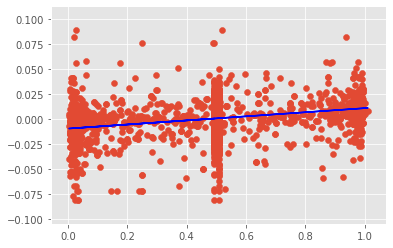

In [12]:
%matplotlib inline
matplotlib.style.use('ggplot')

return_values = np.array(return_values, dtype=float).reshape(-1, 1)
sentiments_scores = np.array(sentiments_scores, dtype=float).reshape(-1, 1)

sentiments_scores = np.where(np.isnan(sentiments_scores), sentiments_scores.mean(), sentiments_scores)

linear_regressor = LinearRegression()
linear_regressor.fit(sentiments_scores, return_values)

plt.scatter(sentiments_scores, return_values)

Y_pred = linear_regressor.predict(sentiments_scores)
plt.plot(sentiments_scores, Y_pred, color='blue')
plt.show()

In [16]:
r2_score(return_values, Y_pred)

0.10324132617110404

In [17]:
mod = sm.OLS(Y_pred, return_values)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [18]:
p_values

x1    1.610683e-52
Name: P>|t|, dtype: float64